In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from keras.optimizers import SGD
from keras.datasets import cifar10

from personal.minivggnet import MiniVGGNet

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


## Train test split on cifar10 dataset

In [2]:
# train and test sets and normalizing our input data
((xtrain, ytrain), (xtest, ytest)) = cifar10.load_data()
xtrain = xtrain.astype(np.float32) / 255.0
xtest = xtest.astype(np.float32) / 255.0

# one hot encode our class labels
lb = LabelBinarizer()
ytrain = lb.fit_transform(ytrain)
ytest = lb.transform(ytest)

print('xtrain shape: {} | ytrain shape: {}'.format(xtrain.shape, ytrain.shape), '\n')
print('xtest shape: {} | ytest shape: {}'.format(xtest.shape, ytest.shape))

xtrain shape: (50000, 32, 32, 3) | ytrain shape: (50000, 10) 

xtest shape: (10000, 32, 32, 3) | ytest shape: (10000, 10)


## Global parameter settings

In [3]:
num_classes = 10
max_epochs = 40
batch_size = 64
learning_rate = 0.01
mom = 0.9
decay = learning_rate / max_epochs

## Initializing the optimizer and training the network

In [4]:
opt = SGD(lr=learning_rate, decay=decay, momentum=mom, nesterov=True)

model = MiniVGGNet.build(width=32, height=32, depth=3, classes=num_classes)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [5]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=batch_size,
                   epochs=max_epochs, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 22s 444us/step - loss: 1.6295 - acc: 0.4541 - val_loss: 1.2057 - val_acc: 0.5876
Epoch 2/40
50000/50000 [==============================] - 19s 386us/step - loss: 1.1471 - acc: 0.6035 - val_loss: 0.9380 - val_acc: 0.6718
Epoch 3/40
50000/50000 [==============================] - 19s 384us/step - loss: 0.9624 - acc: 0.6620 - val_loss: 0.8322 - val_acc: 0.7045
Epoch 4/40
50000/50000 [==============================] - 19s 379us/step - loss: 0.8616 - acc: 0.6991 - val_loss: 0.7621 - val_acc: 0.7297
Epoch 5/40
50000/50000 [==============================] - 19s 389us/step - loss: 0.7888 - acc: 0.7229 - val_loss: 0.7482 - val_acc: 0.7421
Epoch 6/40
50000/50000 [==============================] - 20s 404us/step - loss: 0.7327 - acc: 0.7420 - val_loss: 0.7074 - val_acc: 0.7551
Epoch 7/40
50000/50000 [==============================] - 21s 420us/step - loss: 0.6846 - acc: 0.7593 - val_loss: 0.

## Evaluating the network and classification report

In [6]:
ypred = model.predict(xtest, batch_size=batch_size)

# class label names for cifar10 dataset
label_names = ['airplane', 'automobile', 'bird',
               'cat', 'deer', 'dog', 'frog',
               'horse', 'ship', 'truck']

# classification report
print(classification_report(ytest.argmax(axis=1),
                           ypred.argmax(axis=1),
                           target_names=label_names))

              precision    recall  f1-score   support

    airplane       0.87      0.80      0.84      1000
  automobile       0.93      0.93      0.93      1000
        bird       0.74      0.73      0.74      1000
         cat       0.69      0.65      0.67      1000
        deer       0.75      0.83      0.79      1000
         dog       0.75      0.74      0.75      1000
        frog       0.84      0.91      0.87      1000
       horse       0.90      0.85      0.87      1000
        ship       0.90      0.91      0.90      1000
       truck       0.88      0.91      0.90      1000

   micro avg       0.82      0.82      0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



## Training loss and accuracy

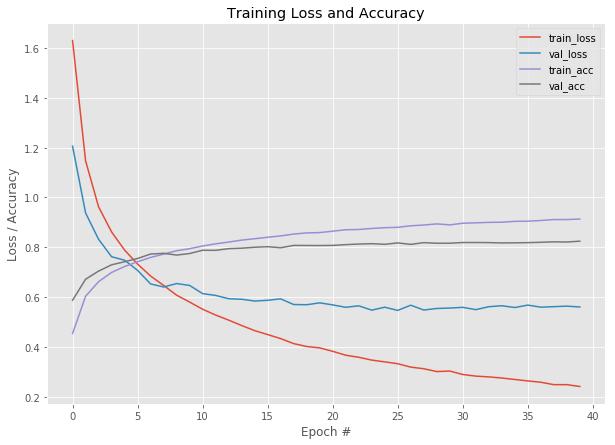

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))

plt.plot(np.arange(max_epochs), history.history['loss'], label='train_loss')
plt.plot(np.arange(max_epochs), history.history['val_loss'], label='val_loss')
plt.plot(np.arange(max_epochs), history.history['acc'], label='train_acc')
plt.plot(np.arange(max_epochs), history.history['val_acc'], label='val_acc')

plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()